## Copy this notebook (if using Colab) via `File -> Save a Copy in Drive`.

## You can do this assignment outside of Colab (using your local Python installation) via `File -> Download`.

## <u>**Use the "Text" blocks to provide explanations wherever you find them necessary. Highlight your answers inside these text fields to ensure that we don't miss it while grading your HW.**</u>

## **Setup**

- Code to download the data directly from the colab notebook.
- If you find it easier to download the data from the kaggle website (and uploading it to your drive), you can skip this section.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# First mount your drive before running these cells.
# Create a folder for the this HW and change to that dir
%cd drive/MyDrive/CSE519

/content/drive/MyDrive/CSE519


# Download data from Kaggle

In [ ]:
# !pip install -q kaggle

In [ ]:
# from google.colab import files
# # Create a new API token under "Account" in the kaggle webpage and download the json file
# # Upload the file by clicking on the browse
# files.upload()

In [ ]:
# ! mkdir ~/.kaggle

In [ ]:
# ! cp kaggle.json ~/.kaggle/

In [ ]:
# !kaggle competitions download -c commonlit-evaluate-student-summaries

# Alternate: download data using gdown (if having issues with Kaggle)

In [ ]:
# !pip install gdown

In [ ]:
# import gdown
# url = 'https://drive.google.com/uc?id=164sQHZYvxU2XXPokrjzqv9MCGAMHaCIM'
# gdown.download(url)

# Extract data and install packages (regardless of data acquisition method)

In [ ]:
# !unzip commonlit-evaluate-student-summaries.zip

In [ ]:
### TODO: Install required packages
### Student's code here
!pip install pandas
!pip install scikit-learn
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install nltk
!pip install tabulate
!pip install spacy
!python -m spacy download en_core_web_sm
### END

2023-09-28 01:50:27.758910: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-28 01:50:29.494280: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 54.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## **Section 1: Library and Data Imports (Q1, 5 points)**

- Import your libraries and join the data from both `summaries_train.csv` and `prompts_train.csv` into a single dataframe with the same structure as `use_cols`. Print the head of the dataframe. **Do not modify `use_cols`.**

In [ ]:
### TODO: Load required packages
### Student's code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import spacy
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from tabulate import tabulate
from nltk.corpus import stopwords
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('vader_lexicon')
nltk.download('words')
nltk.download('punkt')
nltk.download('stopwords')
###

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#Initial data view

df = pd.read_csv('prompts_test.csv')
print('------------------ \n File: prompts_test.csv \n Len of dataset: ' + str(len(df)))
print(tabulate(df.head(), headers='keys', tablefmt='pretty', showindex=False))

df = pd.read_csv('prompts_train.csv')
print('------------------  \n File: prompts_train.csv \n Len of dataset: ' + str(len(df)))
print(tabulate(df.head(), headers='keys', tablefmt='pretty', showindex=False))

df = pd.read_csv('sample_submission.csv')
print('------------------  \n File: sample_submission.csv \n Len of dataset: ' + str(len(df)))
print(tabulate(df.head(), headers='keys', tablefmt='pretty', showindex=False))

df = pd.read_csv('summaries_test.csv')
print('------------------  \n File: summaries_test.csv \n Len of dataset: ' + str(len(df)))
print(tabulate(df.head(), headers='keys', tablefmt='pretty', showindex=False))

df = pd.read_csv('summaries_train.csv')
print('------------------ \n File: summaries_train.csv \n Len of dataset: ' + str(len(df)))
print(tabulate(df.head(), headers='keys', tablefmt='pretty', showindex=False))

------------------ 
 File: prompts_test.csv 
 Len of dataset: 2
+-----------+-----------------+-----------------+-------------+
| prompt_id | prompt_question |  prompt_title   | prompt_text |
+-----------+-----------------+-----------------+-------------+
|  abc123   |  Summarize...   | Example Title 1 |   Heading   |
|           |                 |                 |   Text...   |
|  def789   |  Summarize...   | Example Title 2 |   Heading   |
|           |                 |                 |   Text...   |
+-----------+-----------------+-----------------+-------------+
------------------  
 File: prompts_train.csv 
 Len of dataset: 4
+-----------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------+----------------------------------------------------------------------------------------------------------------------------------

In [ ]:
use_cols = ["student_id",
            "prompt_id",
            "text",
            "content",
            "wording",
            "prompt_question",
            "prompt_title",
            "prompt_text"
           ]
dtypes = {
        'student_id':                                    'string',
        'prompt_id':                                     'string',
        'text':                                          'string',
        'content':                                       'Float64',
        'wording':                                       'Float64',
        'prompt_question':                               'string',
        'prompt_title':                                  'string',
        'prompt_text':                                   'string',
        }

In [ ]:
#Joining dataframes
df1 = pd.read_csv('summaries_train.csv')
df2 = pd.read_csv('prompts_train.csv')
df = pd.merge(df1, df2, on='prompt_id', how = 'inner')

print("Columns: \n")

for col in df.columns:
    print(col)

Columns: 

student_id
prompt_id
text
content
wording
prompt_question
prompt_title
prompt_text


## **Section 2: Features (Q2 and Q3, 25 points total)**

In [ ]:
#Elementary Data Preprocessing

#Converting dataframe to lowercase

df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
print(df.head())

     student_id prompt_id                                               text  \
0  000e8c3c7ddb    814d6b  the third wave was an experimentto see how peo...   
1  0070c9e7af47    814d6b  the third wave developed  rapidly because the ...   
2  0095993991fe    814d6b  the third wave only started as an experiment w...   
3  00c20c6ddd23    814d6b  the experimen was orginally about how even whe...   
4  00d40ad10dc9    814d6b  the third wave developed so quickly due to the...   

    content   wording                                    prompt_question  \
0  0.205683  0.380538  summarize how the third wave developed over su...   
1  3.272894  3.219757  summarize how the third wave developed over su...   
2  0.205683  0.380538  summarize how the third wave developed over su...   
3  0.567975  0.969062  summarize how the third wave developed over su...   
4 -0.910596 -0.081769  summarize how the third wave developed over su...   

     prompt_title                                        promp

In [ ]:
#Adding features like: Number of words in student response (text) and prompt (prompt_text)
# Number of distinct words in student response (text) and prompt (prompt_text)
# Number of words common to student response (text) and prompt (prompt_text)
# Number of words common to student response (text) and prompt_question
# Number of words common to student response (text) and prompt_title


def word_count(text):
  if pd.isna(text):
    return 0
  return len(text.split())

def word_unique(text):
  words = set(text.split(' ') if isinstance(text, str) else [])
  return len(words)


def common_words(row, col1, col2):
  words_1 = list(row[col1].split() if isinstance(row[col1], str) else [])
  words_2 = list(row[col2].split() if isinstance(row[col2], str) else [])
  common = [val for val in words_1 if val in words_2]
  return len(common)



df1 = pd.DataFrame()
df1['student_id'] = df['student_id']
df1['prompt_id'] = df['prompt_id']
df1['content'] = df['content']
df1['wording'] = df['wording']
df1['no_of_words_text'] = df['text'].apply(word_count)
df1['no_of_words_prompt'] = df['prompt_text'].apply(word_count)
df1['unique_text'] = df['text'].apply(word_unique)
df1['unique_prompt'] = df['prompt_text'].apply(word_unique)
df1['common_between_response_prompt'] = df.apply(common_words, args = ('text','prompt_text'),axis = 1)
df1['common_between_response_prompt_question'] = df.apply(common_words, args = ('text','prompt_question'),axis = 1)
df1['common_between_response_prompt_title'] = df.apply(common_words, args = ('text','prompt_title'),axis = 1)
print(tabulate(df1.head(), headers='keys', tablefmt='pretty', showindex=False))

+--------------+-----------+--------------------+---------------------+------------------+--------------------+-------------+---------------+--------------------------------+-----------------------------------------+--------------------------------------+
|  student_id  | prompt_id |      content       |       wording       | no_of_words_text | no_of_words_prompt | unique_text | unique_prompt | common_between_response_prompt | common_between_response_prompt_question | common_between_response_prompt_title |
+--------------+-----------+--------------------+---------------------+------------------+--------------------+-------------+---------------+--------------------------------+-----------------------------------------+--------------------------------------+
| 000e8c3c7ddb |  814d6b   | 0.205682506482641  |  0.380537638762288  |        61        |        596         |     49      |      293      |               33               |                    9                    |                

## **Section 3: Content and Wording (Q4, 10 points)**

**FEATURES ADDED:**

1. **CORRECTNESS** - Index of correctness defined as 1-(number of incorrect words)/total number of words, less missspelled words correlate to better text quality

2. **PUNCTUATION COUNT** - More punctuation may imply better and more readable text

3. **AVERAGE SENTENCE LENGTH** - A higher average sentence length refers to more complex sentence which may refer to higher score

4. **AVERAGE WORD LENGTH** - Higher average word length represents usage of more complex words

4. **STOPWORD COUNT** - Ratio of number of words to total number of words in text, a lower ratio implies better content quality.

5. **SENTIMENT SCORE** - Whether a text has a high positive or negative sentiment, which may represent highly opinionated texts

6. **ENTITY COUNT** - 'Entity' in Spacy refers to real-world objects or concepts that have specific names, such as names of people, places, organizations, dates, and more, high amount of entities represents more information in text.

In [ ]:
# CORRECTNESS - Index of correctness defined as [1-(number of incorrect words)/(total number of words in text)]
spell_checker = set(nltk.corpus.words.words())
def correctness_index(text):
    words = word_tokenize(text)
    len_text = len(words)
    misspelled_count = sum(1 for word in words if word.lower() not in spell_checker)
    correctness = 1 - (misspelled_count/len_text)
    return correctness

df1['correctness'] = df['text'].apply(correctness_index)

# PUNCTUATION COUNT
def punctuation_count(text):
  punctuation = sum(1 for char in text if char in string.punctuation)
  return punctuation

df1['punctuation'] = df['text'].apply(punctuation_count)

# AVERAGE SENTENCE LENGTH
def average_sentence_length(text):
    sentences = nltk.sent_tokenize(text)
    total_words = sum(len(nltk.word_tokenize(sentence)) for sentence in sentences)
    total_sentences = len(sentences)
    average_sentence_length = total_words / total_sentences
    return average_sentence_length

df1['avg_sentence_length'] = df['text'].apply(average_sentence_length)


# STOPWORD COUNT
def count_stopwords(text):
    words = word_tokenize(text)
    stop_words = set(nltk.corpus.stopwords.words('english'))
    stopwords_count = sum(1 for word in words if word.lower() in stop_words)
    return stopwords_count/len(text)

df1['stopword_count'] = df['text'].apply(count_stopwords)

# AVERAGE WORD LENGTH
def average_word_length(text):
    words = text.split()
    total_characters = sum(len(word) for word in words)
    total_words = len(words)
    if total_words == 0:
        return 0
    else:
        average_length = total_characters / total_words
        return average_length

df1['avg_word_length'] = df['text'].apply(average_word_length)

#SENTIMENT SCORE
def analyze_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores['compound']

df1['sentiment_score'] = df['text'].apply(analyze_sentiment)

#ENTITY COUNT USING SPACY
nlp = spacy.load("en_core_web_sm")
def count_ners(text):
    doc = nlp(text)
    ner_count = 0
    for ent in doc.ents:
        ner_count += 1
    return ner_count

df1['entity_count'] = df['text'].apply(count_ners)

In [ ]:
print(tabulate(df1.head(), headers='keys', tablefmt='pretty', showindex=False))

+--------------+-----------+--------------------+---------------------+------------------+--------------------+-------------+---------------+--------------------------------+-----------------------------------------+--------------------------------------+--------------------+-------------+---------------------+---------------------+-------------------+-----------------+--------------+
|  student_id  | prompt_id |      content       |       wording       | no_of_words_text | no_of_words_prompt | unique_text | unique_prompt | common_between_response_prompt | common_between_response_prompt_question | common_between_response_prompt_title |    correctness     | punctuation | avg_sentence_length |   stopword_count    |  avg_word_length  | sentiment_score | entity_count |
+--------------+-----------+--------------------+---------------------+------------------+--------------------+-------------+---------------+--------------------------------+-----------------------------------------+--------

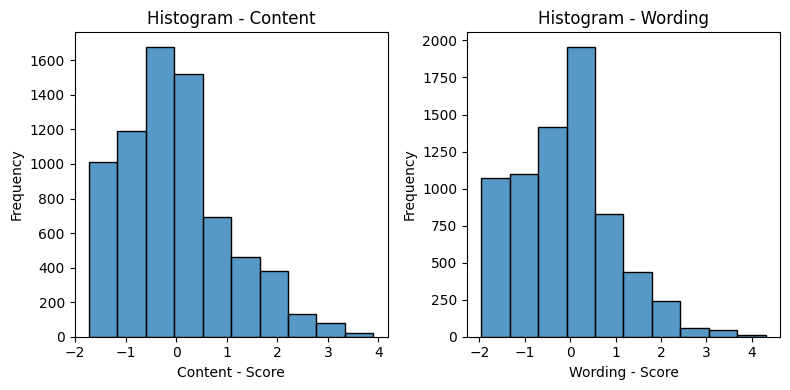

In [ ]:
#HISTOGRAM OF CONTENT AND WORDING

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

sns.histplot(df['content'], bins=10, ax=axes[0])
axes[0].set_title('Histogram - Content')
axes[0].set_xlabel('Content - Score')
axes[0].set_ylabel('Frequency')

sns.histplot(df['wording'], bins=10, ax=axes[1])
axes[1].set_title('Histogram - Wording')
axes[1].set_xlabel('Wording - Score')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


#1. The histograms have similar distributions which makes sense as words with higher content score would have a correlated higher wording score.

#2. It also represents that the entries have a normal distribution leaning left, which means that more students have a lower than average score and few have exceptional content and wording scores.

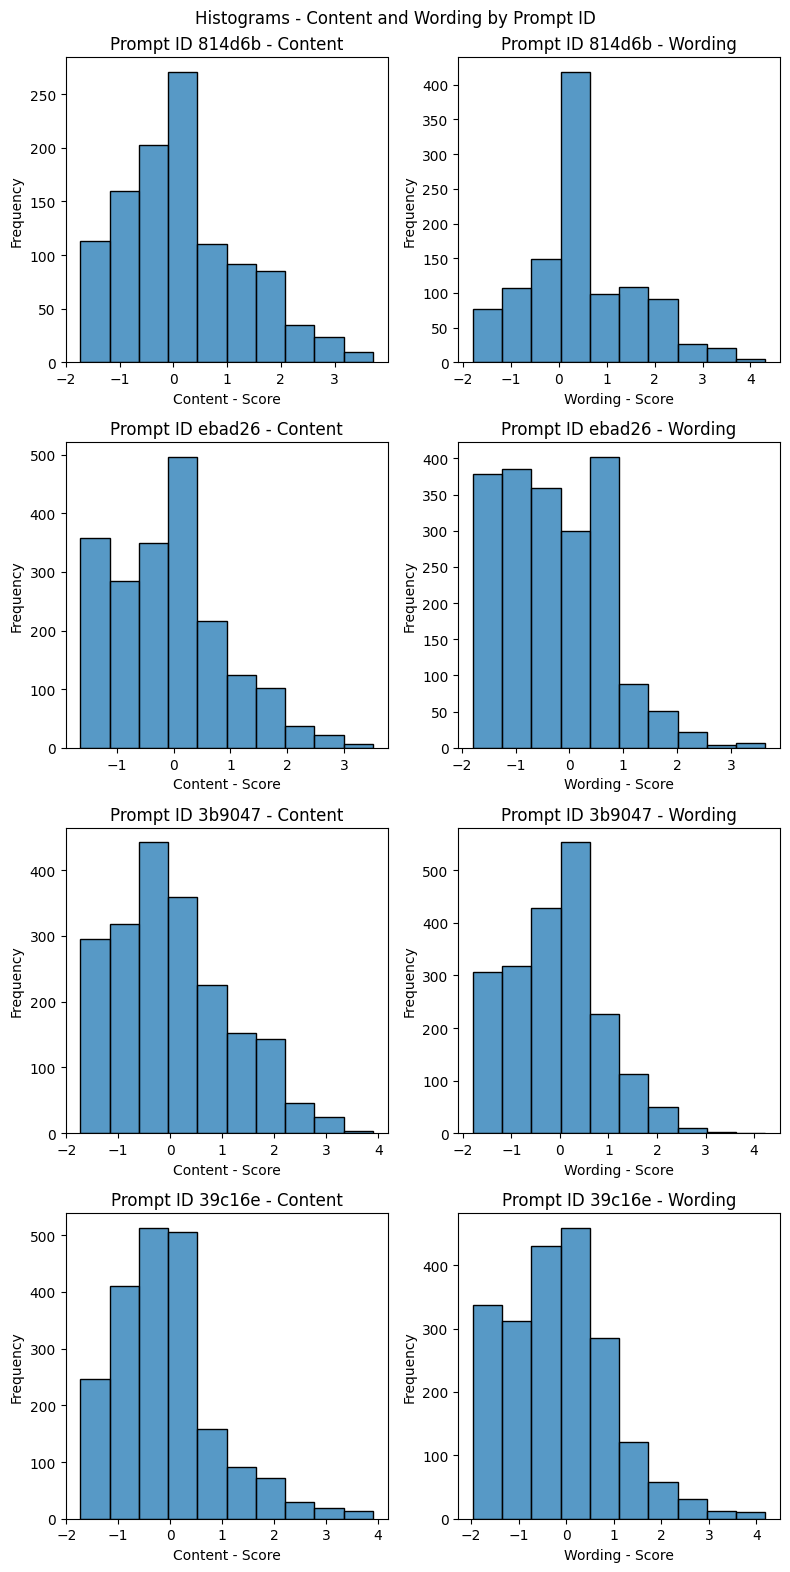

In [ ]:
#HISTOGRAM OF CONTENT AND WORDING BASED ON PROMPT IDS
unique_prompt_ids = df['prompt_id'].unique()

num_plots = len(unique_prompt_ids)
rows = num_plots
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(8, 4 * rows))
fig.suptitle('Histograms - Content and Wording by Prompt ID')

for i, prompt_id in enumerate(unique_prompt_ids):
    row = i
    col_content = 0
    col_wording = 1

    data = df[df['prompt_id'] == prompt_id]

    sns.histplot(data['content'], bins=10, ax=axes[row, col_content])
    axes[row, col_content].set_title(f'Prompt ID {prompt_id} - Content')
    axes[row, col_content].set_xlabel('Content - Score')
    axes[row, col_content].set_ylabel('Frequency')

    sns.histplot(data['wording'], bins=10, ax=axes[row, col_wording])
    axes[row, col_wording].set_title(f'Prompt ID {prompt_id} - Wording')
    axes[row, col_wording].set_xlabel('Wording - Score')
    axes[row, col_wording].set_ylabel('Frequency')

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

#For different prompts, the some uniforms are not standard (normal skewed left) this maybe as there are not as enough entries for each prompt. Overall the histograms are still pretty similar, few notable ones are the graphs for prompt 'ebad26' which shows many students who wrote that prompt had very low score in content and wording.

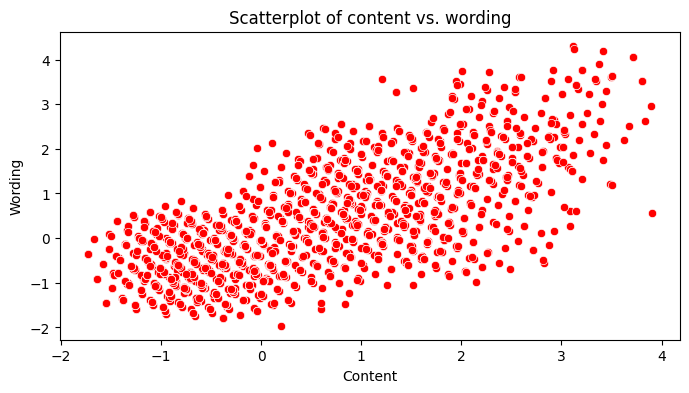

In [ ]:
#SCATTERPLOT OF CONTENT VS WORDING

plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='content', y='wording', marker='o', color='r')
plt.title('Scatterplot of content vs. wording')
plt.xlabel('Content')
plt.ylabel('Wording')

plt.show()

Inference:

The scatter plot shows a strong correlation between content and wording.

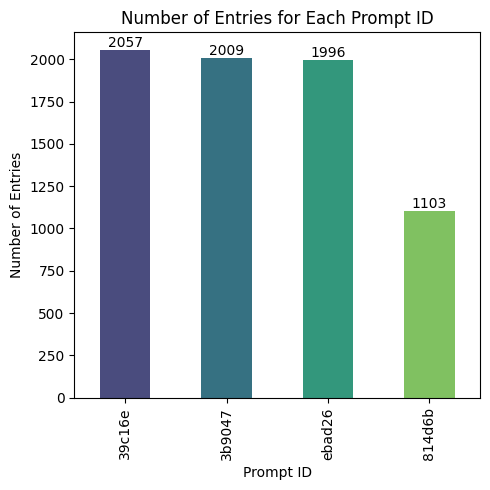

In [ ]:
prompt_id_counts = df1['prompt_id'].value_counts()
plt.figure(figsize=(5,5))
sns.barplot(x=prompt_id_counts.index, y=prompt_id_counts.values, palette="viridis", width = 0.5)
plt.xticks(rotation=90)
plt.xlabel('Prompt ID')
plt.ylabel('Number of Entries')
plt.title('Number of Entries for Each Prompt ID')
for i, count in enumerate(prompt_id_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()


#The number of entries for '814d6b' are significantly less than other prompts, which can lead to skewed results for this particular prompt.

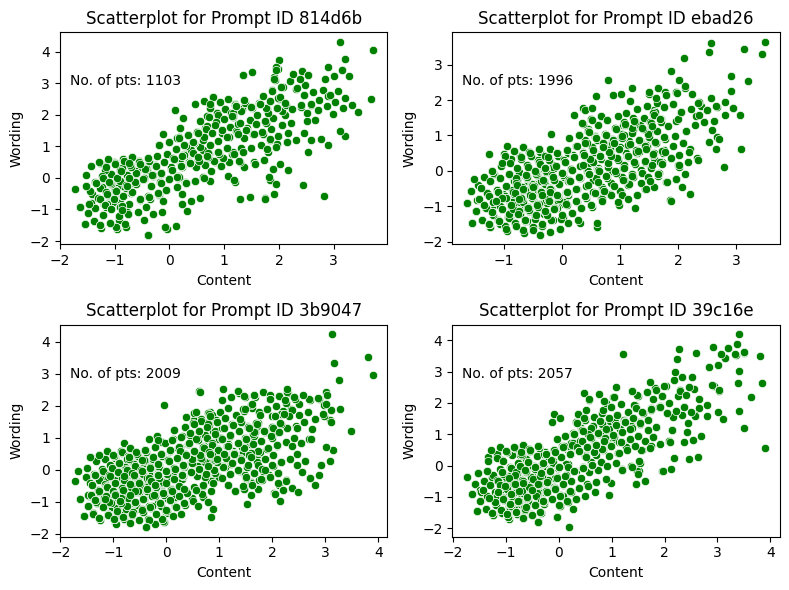

In [ ]:
unique_prompt_ids = df['prompt_id'].unique()

fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axes = axes.ravel()
for i, prompt_id in enumerate(unique_prompt_ids):
    ax = axes[i]
    subset = df[df['prompt_id'] == prompt_id]
    sns.scatterplot(data=subset, x='content', y='wording', marker='o', color = 'green', ax=ax)
    ax.set_title(f'Scatterplot for Prompt ID {prompt_id}')
    ax.set_xlabel('Content')
    ax.set_ylabel('Wording')
    num_entries = len(subset)
    ax.annotate(f'No. of pts: {num_entries}', xy=(0.2, 0.75), xycoords='axes fraction', fontsize=10, ha='center')

plt.tight_layout()
plt.show()

#Roughly all scatterplots for different prompts show a similar strong correlation between content and wording.

## **Section 4: Words in Good and Bad Essays (Q5, 10 points)**

In [ ]:
df3 = pd.DataFrame()
df3['content'] = df['content']
df3['wording'] = df['wording']
df3['prompt_id'] = df['prompt_id']
stop_words = set(stopwords.words('english'))
df3['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))#stopword removal
print(tabulate(df3.head(), headers='keys', tablefmt='pretty', showindex=False))

+--------------------+---------------------+-----------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|      content       |       wording       | prompt_id |                                  

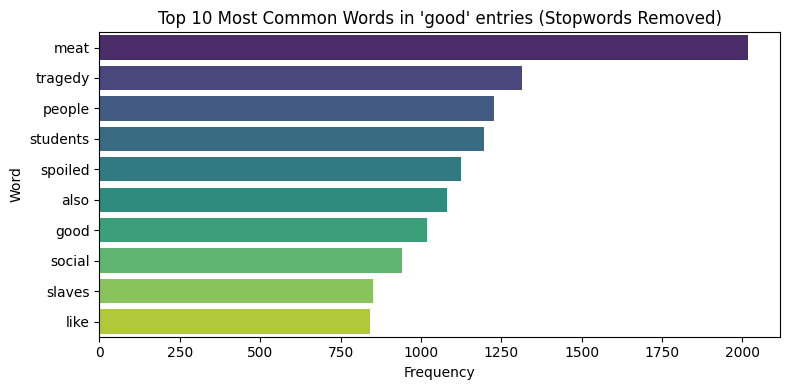

In [ ]:
median_content = df3['content'].median()
median_wording = df3['wording'].median()

filtered_df = df3[(df3['content'] >= median_content) & (df3['wording'] >= median_wording)]
stop_words = set(stopwords.words('english'))
all_words = ' '.join(filtered_df['text']).split()
word_counter = Counter(all_words)
custom_stopwords = set(["would", "could"])
word_counter = {word: count for word, count in word_counter.items() if word.lower() not in custom_stopwords}
common_words = Counter(word_counter).most_common(10)
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
plt.figure(figsize=(8, 4))
sns.barplot(data=common_words_df, x='Frequency', y='Word', palette='viridis')
plt.title('Top 10 Most Common Words in \'good\' entries (Stopwords Removed)')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

#Top words in the 'good' (both content and wording above median) entries.

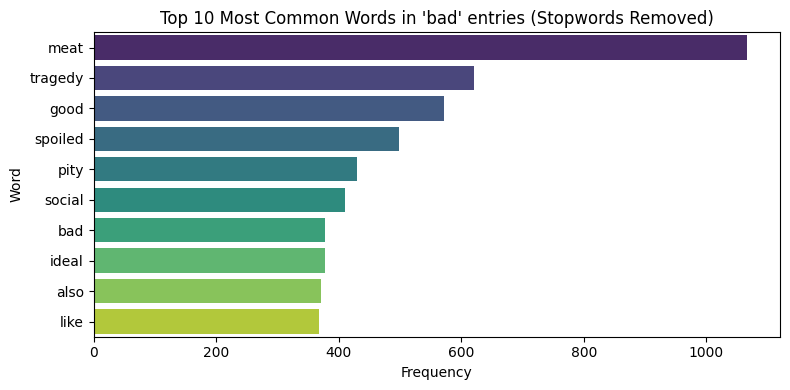

In [ ]:
filtered_df = df3[(df3['content'] < median_content) & (df3['wording'] < median_wording)]
stop_words = set(stopwords.words('english'))
all_words = ' '.join(filtered_df['text']).split()
word_counter = Counter(all_words)
custom_stopwords = set(["would", "could"])
word_counter = {word: count for word, count in word_counter.items() if word.lower() not in custom_stopwords}
common_words = Counter(word_counter).most_common(10)
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
plt.figure(figsize=(8, 4))
sns.barplot(data=common_words_df, x='Frequency', y='Word', palette='viridis')
plt.title('Top 10 Most Common Words in \'bad\' entries (Stopwords Removed)')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

#Top words in the 'bad' (both content and wording above median) entries.

#A lot of these entries are similar such as 'meat', 'tragedy', 'spoiled', these implies that the particular words used donot necessarily signify text quality.

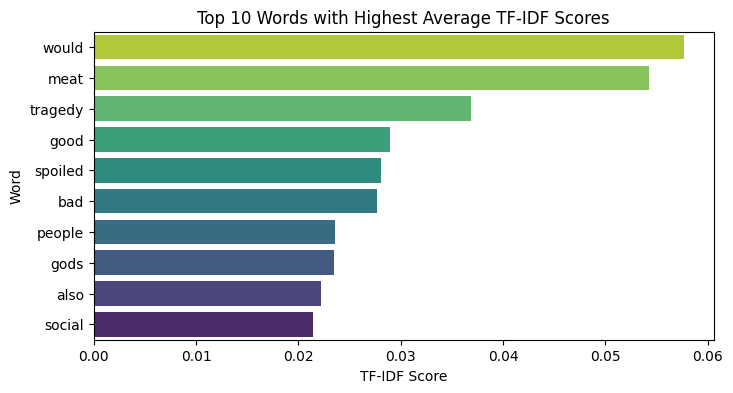

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df3['text'])
feature_names = tfidf_vectorizer.get_feature_names_out()
average_tfidf_scores = tfidf_matrix.mean(axis=0).tolist()[0]
tfidf_df = pd.DataFrame({'Word': feature_names, 'TF-IDF Score': average_tfidf_scores})
top_10_df = tfidf_df.nlargest(10, 'TF-IDF Score')
top_10_df = top_10_df.sort_values(by='TF-IDF Score', ascending=True)
plt.figure(figsize=(8, 4))
sns.barplot(x='TF-IDF Score', y='Word', data=top_10_df, palette='viridis')
plt.xlabel('TF-IDF Score')
plt.ylabel('Word')
plt.title('Top 10 Words with Highest Average TF-IDF Scores')
plt.gca().invert_yaxis()
plt.show()

#A better way to find relevant words is using the tf-idf score, as it shows how 'unique' the word is relative to all other words. A lot of words are still similar here to the other two plots such as 'meat'.

#For some reason we are getting 'would' with a high td-idf score even though it it similar to a stopword, I think it maybe because it was not considerd a stopword initially and then ended up having high term frequency and inverse document frequency

## **Section 5: Three Interesting Plots (Q6, 15 points)**

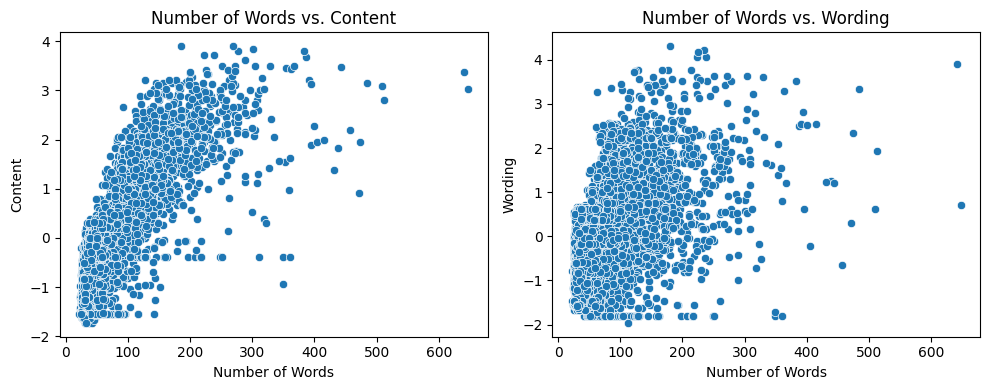


Correlation between Number of Words and Content: 0.792626252170925

Correlation between Number of Words and Wording: 0.5363430984854717


In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df1, x='no_of_words_text', y='content')
plt.title('Number of Words vs. Content')
plt.xlabel('Number of Words')
plt.ylabel('Content')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df1, x='no_of_words_text', y='wording')
plt.title('Number of Words vs. Wording')
plt.xlabel('Number of Words')
plt.ylabel('Wording')

plt.tight_layout()
plt.show()



correlation = df1['no_of_words_text'].corr(df1['content'])
print(f'\nCorrelation between Number of Words and Content: {correlation}')

correlation = df1['no_of_words_text'].corr(df1['wording'])
print(f'\nCorrelation between Number of Words and Wording: {correlation}')

#Higher number of words represent better content scores, it makes sense as longer passages mean more comprehensive texts. However, it is not that correlated to 'wording' the correlation scores of 0.79 (in content and number of words) also shows the high correlation between the two quantities.

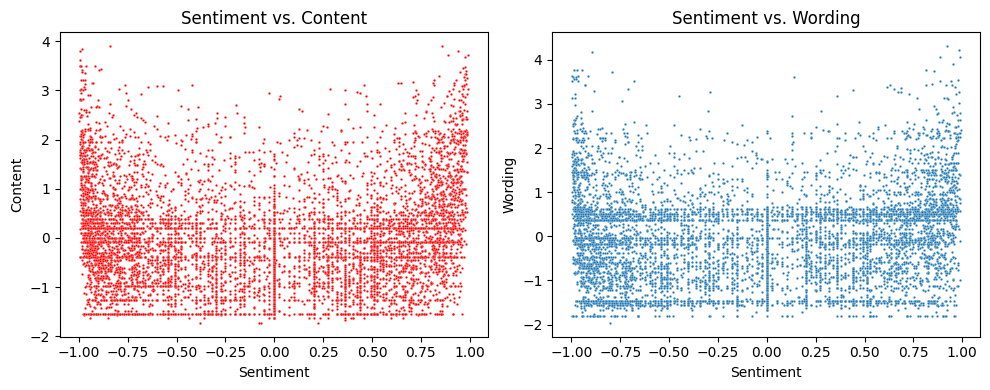


Correlation between Number of Words and Content: 0.04285711635107188

Correlation between Number of Words and Wording: 0.09964622837304568


In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df1, x='sentiment_score', y='content',  s=3, color = 'red')
plt.title('Sentiment vs. Content')
plt.xlabel('Sentiment')
plt.ylabel('Content')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df1, x='sentiment_score', y='wording',  s=3)
plt.title('Sentiment vs. Wording')
plt.xlabel('Sentiment')
plt.ylabel('Wording')

plt.tight_layout()
plt.show()

correlation = df1['sentiment_score'].corr(df1['content'])
print(f'\nCorrelation between Number of Words and Content: {correlation}')

correlation = df1['sentiment_score'].corr(df1['wording'])
print(f'\nCorrelation between Number of Words and Wording: {correlation}')

#This is another interesting plot! Even though sentiment score and content/wording donot have a strong correlation, we can notice that, some of the very high content and wording scores have strong sentiment score(strongly positive or negative). This tells us two things as the graph is more dense at the edges:

#1. Students tend to write highly opinionted pieces(either positive or negative)
#2. A lot of good pieces are highly opinionated.

#However we need to be careful, as this does not necessarily imply that a higher sentiment score means better quality of text as it may just be the case that the sample size of neutral sentiment pieces is lower, leading to lower content and wording scores.

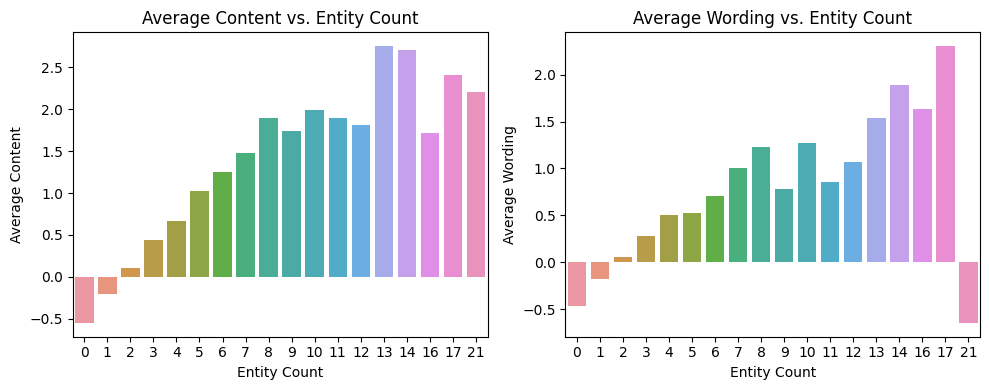

In [ ]:
average_content = df1.groupby('entity_count')['content'].mean()
average_wording = df1.groupby('entity_count')['wording'].mean()

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.barplot(x=average_content.index, y=average_content.values)
plt.title('Average Content vs. Entity Count')
plt.xlabel('Entity Count')
plt.ylabel('Average Content')

plt.subplot(1, 2, 2)
sns.barplot(x=average_wording.index, y=average_wording.values)
plt.title('Average Wording vs. Entity Count')
plt.xlabel('Entity Count')
plt.ylabel('Average Wording')

plt.tight_layout()
plt.show()

#A high entity_score can imply that the summary is more informative. which is visible n the graphs, as lower entity count has corresponding lower scores. But we see a outlier in the wording graph at 21 entity count. It is probably an outlier, let us explore it more.

In [ ]:
entity_count_to_print = 21
filtered_df = df1[df1['entity_count'] == 21]
print(tabulate(filtered_df.head(), headers='keys', tablefmt='pretty', showindex=False))

single_df = df[df['student_id'] == 'd7050b556b1d']
print(tabulate(single_df.head(), headers='keys', tablefmt='pretty', showindex=False))


+--------------+-----------+------------------+-------------------+------------------+--------------------+-------------+---------------+--------------------------------+-----------------------------------------+--------------------------------------+--------------------+-------------+---------------------+---------------------+-------------------+-----------------+--------------+
|  student_id  | prompt_id |     content      |      wording      | no_of_words_text | no_of_words_prompt | unique_text | unique_prompt | common_between_response_prompt | common_between_response_prompt_question | common_between_response_prompt_title |    correctness     | punctuation | avg_sentence_length |   stopword_count    |  avg_word_length  | sentiment_score | entity_count |
+--------------+-----------+------------------+-------------------+------------------+--------------------+-------------+---------------+--------------------------------+-----------------------------------------+--------------------

#The text seems fine and the corresponding content score is also very high, since we know that content and wording score are highly correlated, a better plot can be achieved by removing the 21 entity count value which is just a single row.

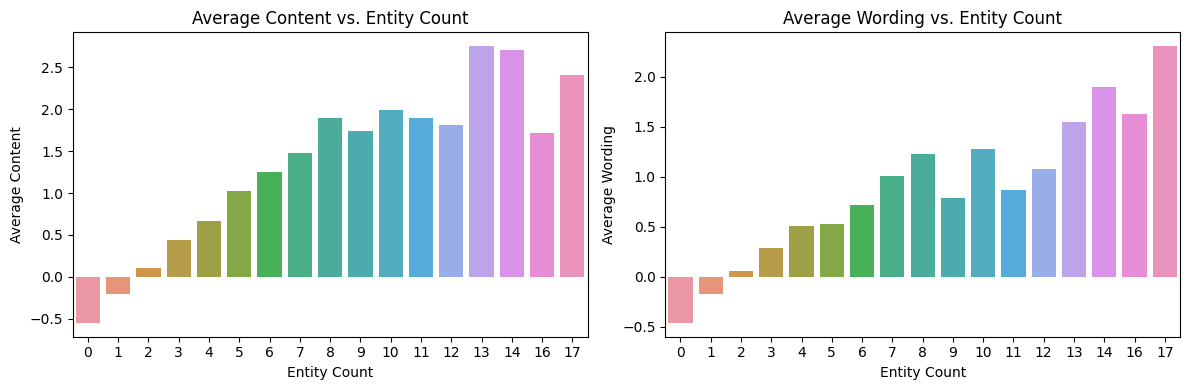

In [ ]:
filtered_df = df1[df1['entity_count'] < 20]

average_content = filtered_df.groupby('entity_count')['content'].mean()
average_wording = filtered_df.groupby('entity_count')['wording'].mean()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.barplot(x=average_content.index, y=average_content.values)
plt.title('Average Content vs. Entity Count')
plt.xlabel('Entity Count')
plt.ylabel('Average Content')

plt.subplot(1, 2, 2)
sns.barplot(x=average_wording.index, y=average_wording.values)
plt.title('Average Wording vs. Entity Count')
plt.xlabel('Entity Count')
plt.ylabel('Average Wording')
plt.tight_layout()
plt.show()

#A graph better depicting how higher entity counts lead to higher average content and wording scores.

<ipython-input-59-7740f9f49961>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr('pearson')


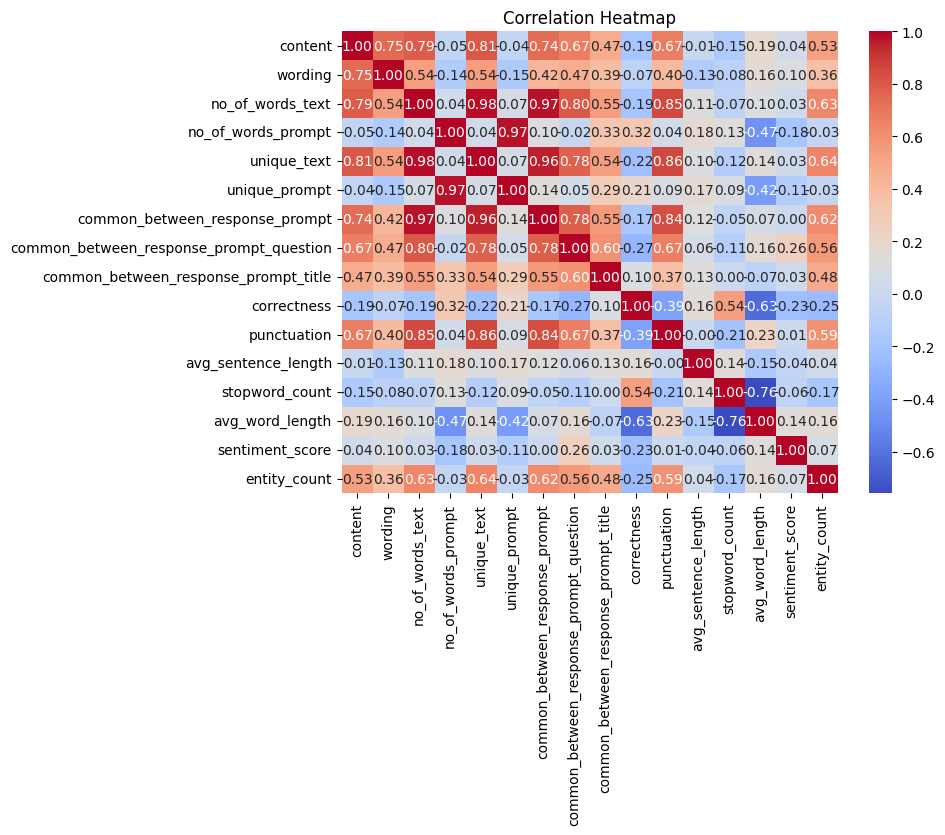

In [ ]:
correlation_matrix = df1.corr('pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#This heatmap of pearson correlation shows us the degree of correlatedness between various variables to help us understand the data better. Some noteable points are:

#1. Content and Wording are strongly correlated with a score of 0.75
#2. Content is correlated to wording with a score of unique_text, which is number of unique words
#3. Wording, apart from Content is correlated with number of words in text.

## **Section 6: Baseline Model (Q7, 10 points)**

**MODEL 0**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x = df1[['correctness', 'punctuation', 'avg_sentence_length', 'stopword_count', 'avg_word_length', 'sentiment_score', 'entity_count']]
y = df1['content']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.5184651020665441


In [ ]:
X = df1[['correctness', 'punctuation', 'avg_sentence_length', 'stopword_count', 'avg_word_length']]
y = df1['wording']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.8014246622134287


#The baseline model has high error rate, and performs pretty average for prediciting wording values.
#Mean Squared Error - MSE is the squareroot of sum of squared distances from the predicted regression line.
#Here, our bias is that data can be modelled linearly.

## **Section 7: Feature Cleaning and Additional Models (Q8 & Q9, 20 points total)**

#Preprocessing done:
#1. Fill empty columns with mean of values(average)
#2. standardize your data - to ensure that features have a mean of 0 and a standard deviation of 1, so that linear regression does not place undue importance to variables high in scale

In [ ]:
from sklearn.preprocessing import StandardScaler

preprocessed_df = df1.copy()
preprocessed_df.drop(columns=['student_id','prompt_id'], inplace=True)
preprocessed_df.fillna(preprocessed_df.mean(), inplace=True)
scaler = StandardScaler()
preprocessed_df = pd.DataFrame(scaler.fit_transform(preprocessed_df), columns=preprocessed_df.columns)
print(tabulate(preprocessed_df.head(), headers='keys', tablefmt='pretty', showindex=False))

+---------------------+-----------------------+----------------------+---------------------+----------------------+---------------------+--------------------------------+-----------------------------------------+--------------------------------------+----------------------+----------------------+----------------------+---------------------+----------------------+---------------------+---------------------+
|       content       |        wording        |   no_of_words_text   | no_of_words_prompt  |     unique_text      |    unique_prompt    | common_between_response_prompt | common_between_response_prompt_question | common_between_response_prompt_title |     correctness      |     punctuation      | avg_sentence_length  |   stopword_count    |   avg_word_length    |   sentiment_score   |    entity_count     |
+---------------------+-----------------------+----------------------+---------------------+----------------------+---------------------+--------------------------------+----------

**MODEL 1**

In [ ]:
x = preprocessed_df[['no_of_words_text',
    'no_of_words_prompt',
    'unique_text',
    'unique_prompt',
    'common_between_response_prompt',
    'common_between_response_prompt_question',
    'common_between_response_prompt_title',
    'correctness',
    'punctuation',
    'avg_sentence_length',
    'stopword_count',
    'avg_word_length']]

y = preprocessed_df['content']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.27548354028975575


In [ ]:
x = preprocessed_df[['no_of_words_text',
    'no_of_words_prompt',
    'unique_text',
    'unique_prompt',
    'common_between_response_prompt',
    'common_between_response_prompt_question',
    'common_between_response_prompt_title',
    'correctness',
    'punctuation',
    'avg_sentence_length',
    'stopword_count',
    'avg_word_length']]

y = preprocessed_df['wording']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.40930852580372923


**MODEL 2**

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

x = preprocessed_df[['no_of_words_text',
                     'no_of_words_prompt',
                     'unique_text',
                     'unique_prompt',
                     'common_between_response_prompt',
                     'common_between_response_prompt_question',
                     'common_between_response_prompt_title',
                     'correctness',
                     'punctuation',
                     'avg_sentence_length',
                     'stopword_count',
                     'avg_word_length']]

y = preprocessed_df['content']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.1959763506429301


In [ ]:
x = preprocessed_df[['no_of_words_text',
                     'no_of_words_prompt',
                     'unique_text',
                     'unique_prompt',
                     'common_between_response_prompt',
                     'common_between_response_prompt_question',
                     'common_between_response_prompt_title',
                     'correctness',
                     'punctuation',
                     'avg_sentence_length',
                     'stopword_count',
                     'avg_word_length']]

y = preprocessed_df['wording']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.3624780586624812


#For preprocessed data, the results are much better after the variables are properly scaled, so that undue advantage is not placed on any of theparticular variable.

# **RESULTS**

LINEAR REGRESSION ERROR
*   MODEL 0 (Without Preprocession) --> Content:0.51  Wording:0.80
*   MODEL 1 (After Preprocessing) --> Content:0.27  Wording:0.40



RANDOM FOREST ERROR
*   MODEL 2 (After Preprocessing) --> Content:0.19  Wording:0.36

#I believe Random Forest outperforms Linear Regression due to its ability to capture nonlinear relationships, as we know that the data is not necessarily linear.

## **Section 8: Kaggle Submission Screenshots (Q10, 5 points)**

Public Score:

Private Score:

Kaggle profile link:

Screenshot(s):